Estimated probability of success (p): 0.6565
Observed frequencies: [ 2  6 24 63 64 50 36]
Expected frequencies: [ 0.4   4.62 22.06 56.2  80.55 61.57 19.61]


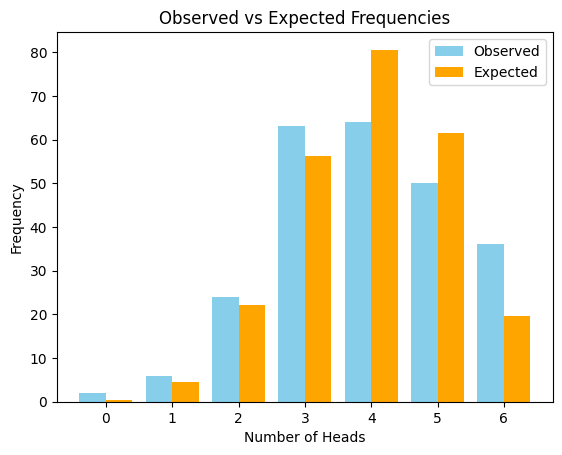

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Given data
x = np.array([0, 1, 2, 3, 4, 5, 6])  # No. of heads
freq = np.array([2, 6, 24, 63, 64, 50, 36])  # Observed frequencies
n = len(x) - 1  # Total number of trials (6 coins)
N = np.sum(freq)  # Total number of experiments (sum of frequencies)

# Step 1: Calculate the mean of the distribution
mean_x = np.sum(x * freq) / N

# Step 2: Estimate probability of success (p)
p = mean_x / n

# Step 3: Compute expected frequencies using the binomial formula
expected_freq = [N * binom.pmf(k, n, p) for k in x]

# Step 4: Display results
print(f"Estimated probability of success (p): {p:.4f}")
print("Observed frequencies:", freq)
print("Expected frequencies:", np.round(expected_freq, 2))

# Step 5: Plot observed vs expected frequencies
plt.bar(x - 0.2, freq, width=0.4, label="Observed", color="skyblue")
plt.bar(x + 0.2, expected_freq, width=0.4, label="Expected", color="orange")
plt.xlabel("Number of Heads")
plt.ylabel("Frequency")
plt.title("Observed vs Expected Frequencies")
plt.legend()
plt.show()


Estimated probability of success (p): 0.6565

Number of Heads	Probability	Expected Frequency	Observed Frequency
0              0.0016         0.40                2
1              0.0188         4.62                6
2              0.0900         22.06               24
3              0.2294         56.20               63
4              0.3288         80.55               64
5              0.2513         61.57               50
6              0.0800         19.61               36


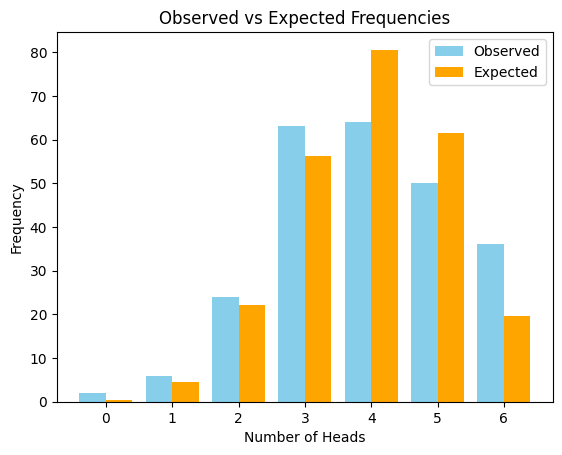

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Given data
x = np.array([0, 1, 2, 3, 4, 5, 6])  # No. of heads
freq = np.array([2, 6, 24, 63, 64, 50, 36])  # Observed frequencies
n = len(x) - 1  # Total number of trials (6 coins)
N = np.sum(freq)  # Total number of experiments (sum of frequencies)

# Step 1: Calculate the mean of the distribution
mean_x = np.sum(x * freq) / N

# Step 2: Estimate probability of success (p)
p = mean_x / n

# Step 3: Compute individual probabilities and expected frequencies
probabilities = [binom.pmf(k, n, p) for k in x]
expected_freq = [N * prob for prob in probabilities]

# Step 4: Display results
print(f"Estimated probability of success (p): {p:.4f}\n")
print("Number of Heads\tProbability\tExpected Frequency\tObserved Frequency")
for i in range(len(x)):
    print(f"{x[i]:<15}{probabilities[i]:<15.4f}{expected_freq[i]:<20.2f}{freq[i]}")

# Step 5: Plot observed vs expected frequencies
plt.bar(x - 0.2, freq, width=0.4, label="Observed", color="skyblue")
plt.bar(x + 0.2, expected_freq, width=0.4, label="Expected", color="orange")
plt.xlabel("Number of Heads")
plt.ylabel("Frequency")
plt.title("Observed vs Expected Frequencies")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import rankdata

# Data
size_midpoints = np.array([15.5, 16.5, 17.5, 18.5, 19.5, 20.5])  # Midpoints (X)
defective_items = np.array([150, 162, 170, 180, 180, 120])       # Defective items (Y)

# Compute ranks
rank_x = rankdata(size_midpoints)  # Ranks for X (no ties)
rank_y = rankdata(defective_items)  # Ranks for Y (includes ties)

# Calculate differences in ranks
d = rank_x - rank_y
d_squared = d**2

# Count ties in Y ranks and apply correction
unique, counts = np.unique(defective_items, return_counts=True)
tie_correction = np.sum([(m**3 - m) / 12 for m in counts if m > 1])

# Spearman's rank correlation with tie correction
n = len(size_midpoints)
spearman_correlation = 1 - (6 * (np.sum(d_squared) + 0.5)) / (n * (n**2 - 1))

print("Ranks for X:", rank_x)
print("Ranks for Y:", rank_y)
print("Differences in ranks (d):", d)
print("Tie Correction:", tie_correction)
print("Spearman's Rank Correlation Coefficient:", spearman_correlation)

Ranks for X: [1. 2. 3. 4. 5. 6.]
Ranks for Y: [2.  3.  4.  5.5 5.5 1. ]
Differences in ranks (d): [-1.  -1.  -1.  -1.5 -0.5  5. ]
Tie Correction: 0.5
Spearman's Rank Correlation Coefficient: 0.11428571428571432
